In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
sns.set()
%matplotlib inline

In [3]:
df=pd.read_csv("Salary_Data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
df.isnull().values.any()

False

# Split data


In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### random_state is mainly for reproducible results as it will always split the data the same way. 

#### train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior

#### This is useful if you want reproducible results, for example in the documentation, so that everybody can consistently see the same numbers when they run the examples. In practice I would say, you should set the random_state to some fixed number while you test stuff, but then remove it in production if you really need a random (and not a fixed) split.

In [8]:
df_copy = train_set.copy()

In [9]:
df_copy.head()

,YearsExperience,Salary
28,10.3,122391.0
24,8.7,109431.0
12,4.0,56957.0
0,1.1,39343.0
4,2.2,39891.0


# Exploratory Data Analysis

### Correlation gives you the measure of the strength of association between two variables.

In [10]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.00000,0.98211
Salary,0.98211,1.00000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


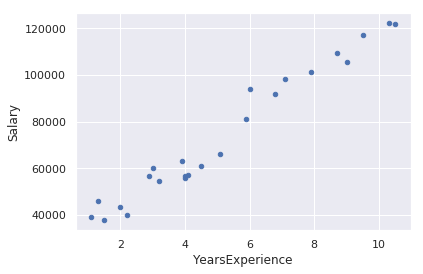

In [11]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

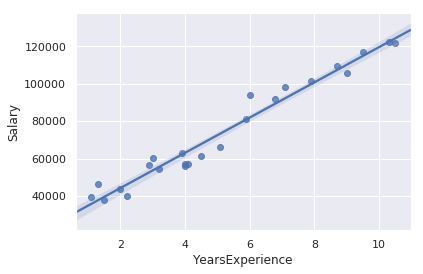

In [12]:
# Regression plot
sns.regplot('YearsExperience', # Horizontal axis
           'Salary', # Vertical axis
           data=df_copy)

# Predict

In [13]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Salary"], axis=1)

In [14]:
train_labels = train_set["Salary"]

In [15]:
train_labels.head()

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

## we want to predict the salary

In [16]:
train_set_full = train_set.copy()

train_set = train_set.drop(["Salary"], axis=1)

In [17]:
train_set.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


## Algo MOdel

In [18]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
salary_pred = lin_reg.predict(test_set)

salary_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

# Analyze Results


In [20]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

Coefficients:  [9423.81532303]
Intercept:  25321.583011776813


### With that information we can build our line formula - $y=9423.81532303x + 25321.5830118$

In [21]:
print(salary_pred)
print(test_set_full["Salary"])

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]
27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
Name: Salary, dtype: float64


In [22]:
lin_reg.score(test_set, test_set_full["Salary"])

0.9024461774180497

In [23]:
r2_score(test_set_full["Salary"], salary_pred)

0.9024461774180497

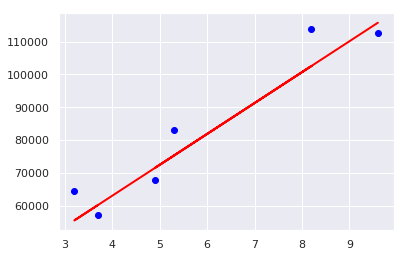

In [24]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"], color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)